## I'll make a plotting tool that will (hopefully) generate appropriate forward/backward distribution plots in desired formats

In [1]:
import numpy as np

The 'ligand tuple pair' dictionary has been generated from the remote directory with `qmlify.analysis.aggregate_per_pair_works`. Let's just load it locally from a `.npz` file.

In [2]:
_dict = np.load(f"tyk2_aggregation_dict.npz", allow_pickle=True)['arr_0'].item()

Let's take the `_dict` and reprocess it as something more readable. Specifically, it will be reprocessed so that all of the 'redundant' plots are put together into the same `np.ndarray`. We can also concatenate these arrays for single 'forward' backward' distributions; `fully_aggregate_work_dict` does this. The last thing to do here is to compute `BAR` estimates for each `forward`/`backward` distribution pair, and for _all_ of the aggregated (concatenated) `forward`/`backward` distribution pairs for each ligand (and each phase).

In [3]:
from qmlify.analysis import fully_aggregate_work_dict, compute_BAR
agg_dict, concat_dict = fully_aggregate_work_dict(work_dict = _dict) #this makes a separate aggregation dict, and a concatenated dict
agg_BARs = compute_BAR(agg_dict) #this comptue BAR for each aggregation dict
concat_BARs = compute_BAR(concat_dict) #this computes BAR for each concatenated dict

The last thing to do is plot the data. Below, I'll plot the data for the un-_aggregated_ forward/backward work histograms and the BAR estimates for each pair (for each phase, for each ligand).

generating 4 plots...
plotting ligands: 0 through 4
plotting ligands: 4 through 8
plotting ligands: 8 through 12
plotting ligands: 12 through 16


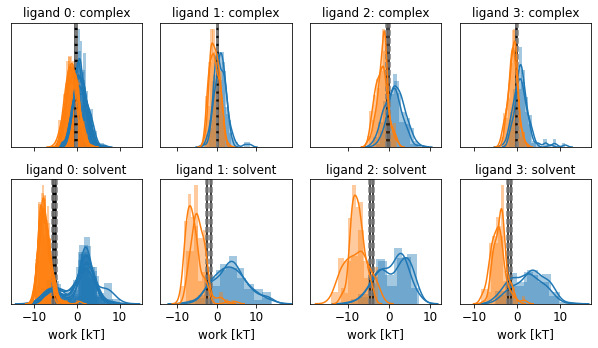

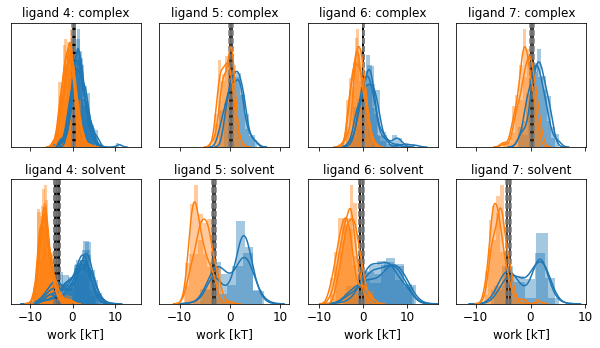

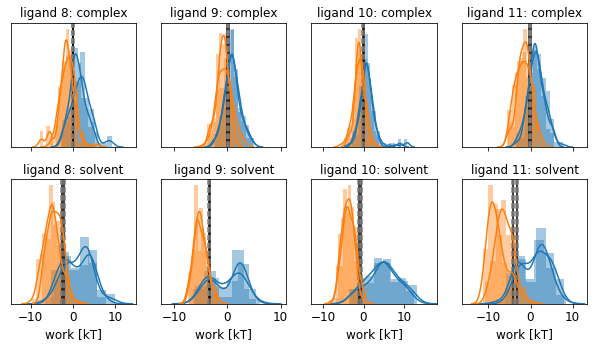

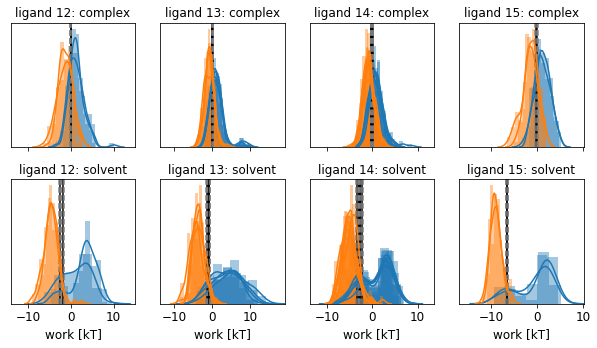

In [4]:
from qmlify.plotting import *
generate_work_distribution_plots(agg_dict, agg_BARs, out_prefix = f"unaggregated", legend=False)

For the sake of a 'complete' dataset, I'll concatenate all of the histogram repeats (which we've already done with the `concat_dict`) and their BAR estimates and replot the data...

generating 4 plots...
plotting ligands: 0 through 4
plotting ligands: 4 through 8
plotting ligands: 8 through 12
plotting ligands: 12 through 16


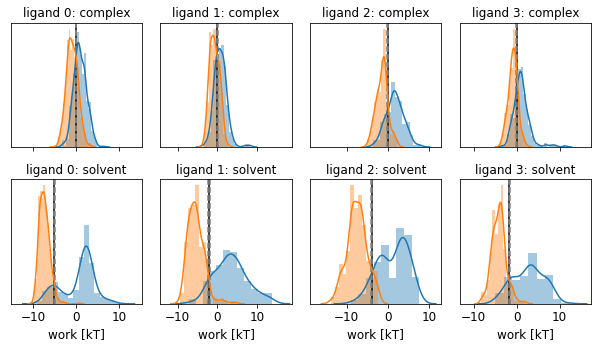

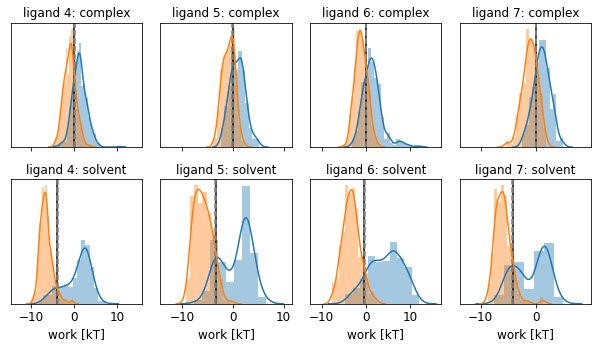

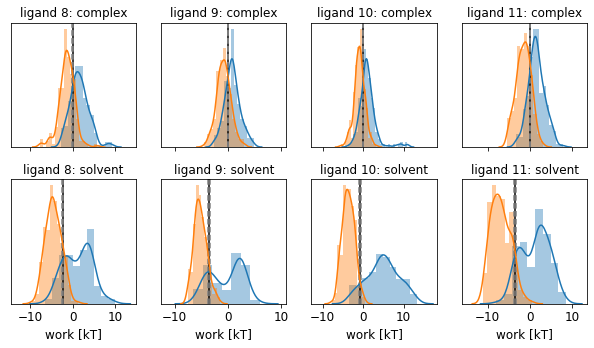

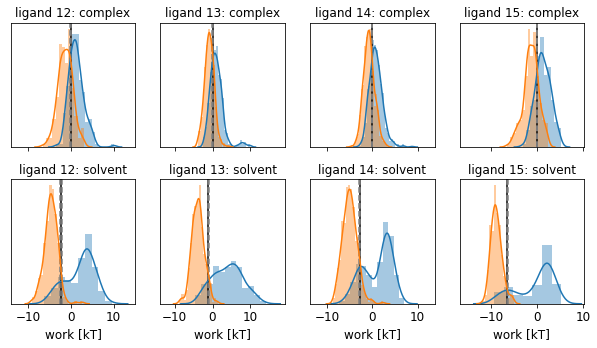

In [5]:
generate_work_distribution_plots(concat_dict, concat_BARs, out_prefix = f"aggregated", legend=False)

The BAR estimates in `concat_BARs` are the ML/MM free energy corrections for each phase for each ligand. These corrections can now be passed to the pre-computed MM free energies.

### I'm going to try to make the free energy corrections now

In [2]:
corr = np.load(f"tyk2_corrections.kT.npz", allow_pickle=True)['arr_0'].item()

In [3]:
def modify_correction_dict(_dict):
    new = {}
    for ligand in _dict.keys():
        phase_dict = {}
        for phase in _dict[ligand].keys():
            tup = _dict[ligand][phase][0]
            phase_dict[phase] = tup
        new[ligand] = phase_dict
    return new

In [4]:
ani_results = modify_correction_dict(corr)

In [5]:
import os
all_sims = []

for results_file in os.listdir('mm_data/'):
    try:
        results = np.load(f'mm_data/{results_file}',allow_pickle=True)
        all_sims.append(results)
    except IsADirectoryError:
        continue

In [6]:
experimental = [-9.540000 , -10.940000 , -8.980000 , -11.310000 , -9.210000 , -8.260000 , -10.980000 , -7.750000 , -9.560000 , -7.420000 , -11.280000 , -9 , -9.700000 , -11.700000 , -9.780000 , -10.530000]


In [7]:
from qmlify.analysis import analyze_mlmm

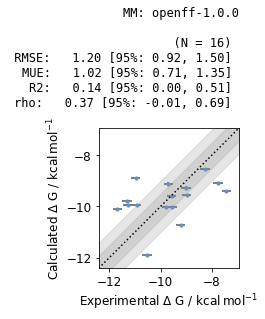

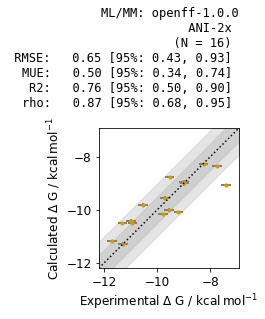

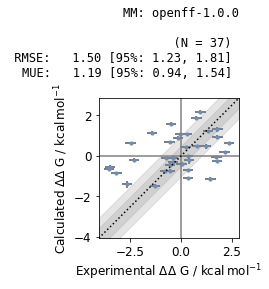

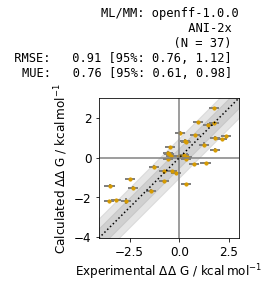

In [8]:
analyze_mlmm(all_sims, ani_results, experimental=experimental, experimental_error=0.18)